In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 175kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.9MB/s]


In [3]:
# Set random seeds for reproducibility
torch.manual_seed(42)

Label: 9
Image shape: torch.Size([1, 28, 28])


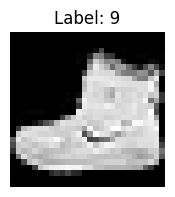

In [4]:
import matplotlib.pyplot as plt

X1, y1 = train_data[0]

print("Label:", y1)
print("Image shape:", X1.shape)

plt.figure(figsize=(2, 3))
plt.imshow(X1.squeeze(), cmap="gray")
plt.title(f"Label: {y1}")
plt.axis("off")
plt.show()

In [5]:
X = torch.stack([img for img, _ in train_data])
y = torch.tensor([label for _, label in train_data])

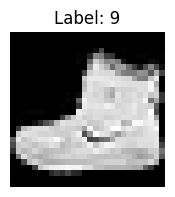

In [6]:
plt.figure(figsize=(2, 3))
plt.imshow(X[0].squeeze(), cmap="gray")
plt.title(f"Label: {y1}")
plt.axis("off")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features.clone().detach().float()  # ensure float32
        self.labels = labels.clone().detach().long()       # ensure long
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [10]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [12]:
class MySimpleANN(nn.Module):
  def __init__(self, num_features = 784):
    super().__init__()
    self.ANN = nn.Sequential(
        nn.Flatten(),
        nn.Linear(num_features, 784),
        nn.ReLU(),
        nn.Linear(784, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 10)
    )

  def forward(self,x):
    return self.ANN(x)

In [14]:
epochs = 30
learning_rate = 0.001

In [15]:
# instatiate the model
model = MySimpleANN()

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

In [16]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.1228788292656342
Epoch: 2 , Loss: 0.7313073759898543
Epoch: 3 , Loss: 0.6685044065117836
Epoch: 4 , Loss: 0.62075005689015
Epoch: 5 , Loss: 0.5821846605588993
Epoch: 6 , Loss: 0.5471043974161148
Epoch: 7 , Loss: 0.5135206434254845
Epoch: 8 , Loss: 0.4874794006037215
Epoch: 9 , Loss: 0.46845350799461205
Epoch: 10 , Loss: 0.44616817266990744
Epoch: 11 , Loss: 0.4332749765987198
Epoch: 12 , Loss: 0.41889992679158844
Epoch: 13 , Loss: 0.40656186901032926
Epoch: 14 , Loss: 0.3937892499690255
Epoch: 15 , Loss: 0.3844952020173272
Epoch: 16 , Loss: 0.37458755749588213
Epoch: 17 , Loss: 0.36790482299402355
Epoch: 18 , Loss: 0.3582658401379983
Epoch: 19 , Loss: 0.3517782878751556
Epoch: 20 , Loss: 0.34454430307572087
Epoch: 21 , Loss: 0.33823650889098644
Epoch: 22 , Loss: 0.3306738506692151
Epoch: 23 , Loss: 0.3259232925561567
Epoch: 24 , Loss: 0.31964947022497653
Epoch: 25 , Loss: 0.3138380905302862
Epoch: 26 , Loss: 0.30769692780449986
Epoch: 27 , Loss: 0.3036483833876749
Ep

In [17]:
model.eval()
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8793333333333333


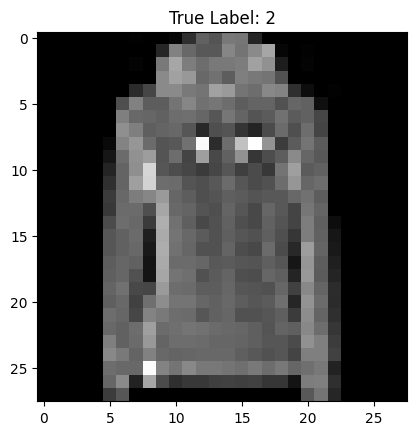

In [18]:
img, label = test_dataset[22]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"True Label: {label}")
plt.show()


In [19]:
x = img.view(-1, 28*28)   # flatten (1, 784)

In [20]:
model.eval()
with torch.no_grad():
    outputs = model(x)
    max_prob, predicted = torch.max(outputs, 1)

In [21]:
import torch.nn.functional as F

model.eval()
with torch.no_grad():
    outputs = model(x)
    probs = F.softmax(outputs, dim=1)  # convert logits → probabilities
    max_prob, predicted = torch.max(probs, 1)  # max prob & class index

print("Predicted class index:", predicted.item())
print("Max Probability:", max_prob.item())
print("True Label:", label)

Predicted class index: 2
Max Probability: 0.8588912487030029
True Label: tensor(2)
